In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#session.query(Measurement.date).order_by(Measurement.date.desc()).all()
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [40]:

recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print ('Recent Date of the data set ' f'{recent[0]}')


Recent Date of the data set 2017-08-23


Text(0.5, 1.0, 'Precipitation of 2016-08-23')

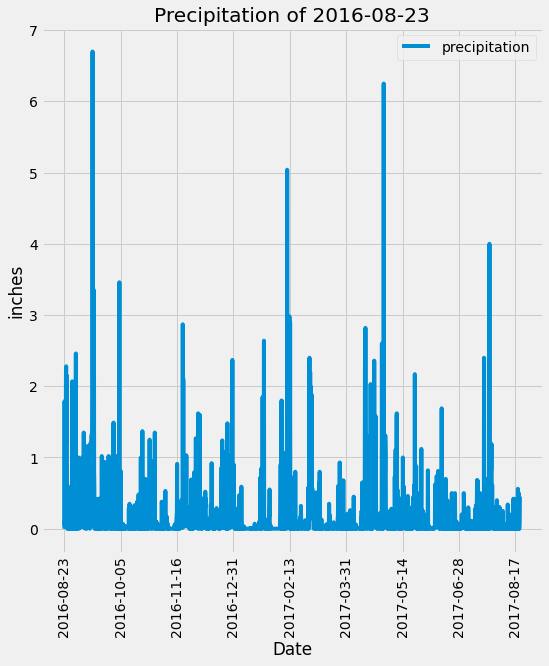

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date= dt.datetime.strptime(recent[0],'%Y-%m-%d')
#print ('Recent Date of the data set ' f'{recent_date}')

# Calculate the date one year from the last date in data set.
#dt.date(2017, 8, 23)
yr_of_Rec_date = dt.date(recent_date.year - 1, recent_date.month, recent_date.day)
#print('One yar from ecent data set' f' {yr_of_Rec_date}')


# Perform a query to retrieve the data and precipitation scores
#
retrive= (Measurement.date, Measurement.prcp)
retrive_date_pre= session.query(*retrive).filter(Measurement.date >= yr_of_Rec_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_pd = pd.DataFrame(retrive_date_pre, columns=['Date','precipitation'])
precipitation_pd = prcp.set_index("Date")

# Sort the dataframe by date
precipitation_pd = precipitation_pd.sort_values(["Date"])

precipitation_pd = precipitation_pd.dropna(how='any')
#precipitation_pd.head(10)
# Use Pandas Plotting with Matplotlib to plot the precipitation.head() data
precipitation_pd.plot(figsize=(8,9))
plt . xticks(rotation = 'vertical' ) 
plt . ylabel( 'inches' ) 
plt . title( 'Precipitation of 'f'{yr_of_Rec_date}' )


In [77]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_pd.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [81]:
# Design a query to calculate the total number stations in the dataset
precipitation_pd.query(Station.id).count()

ValueError: expr must be a string to be evaluated, <class 'sqlalchemy.orm.attributes.InstrumentedAttribute'> given

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()